# Volatility
- https://www.investopedia.com/terms/v/volatility.asp
- Why log returns
    - https://quantivity.wordpress.com/2011/02/21/why-log-returns/
- The higher the volatility, the riskier the security
- Volatility is often measured as the standard deviation
- Or variance between returns from that same security 

### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead
import numpy as np

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(5)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE
VIAFIN.HE
NESTE.HE
GOFORE.HE


In [14]:
def price_history(company, timeline):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2018-04-12', '2021-04-12', timeline)
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    if timeline == 'weekly':
        df.to_csv(f"results/price_history_weekly_{company.split('.')[0]}.csv")
    elif timeline == 'monthly':
        df.to_csv(f"results/price_history_monthly_{company.split('.')[0]}.csv")
    else:
        df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [15]:
top_prices = []

for i in top_companies:
    price_history(i, 'daily')    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv
results/price_history_VIAFIN.csv
results/price_history_NESTE.csv
results/price_history_GOFORE.csv


In [16]:
df_data = []
for i in top_prices:
    data = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del data['Unnamed: 0']
    df_data.append(data)

#### Use adjusted close whed do comparision

- Easier to evaluate stock performance
- 2-for-1 split does not cause a 50% loss
- Compare the performance of two or more assets

In [27]:
df_volatility = []
for n in range(len(df_data)):
    df = df_data[n]
    df['Log Returns'] = np.log(df['adjclose'] / df['adjclose'].shift())
    df['Volatility'] = df['Log Returns'].rolling(252).std()*(252**0.5)
    df_volatility.append(df)

0.4189405018475792

'41.9'

<IPython.core.display.Javascript object>


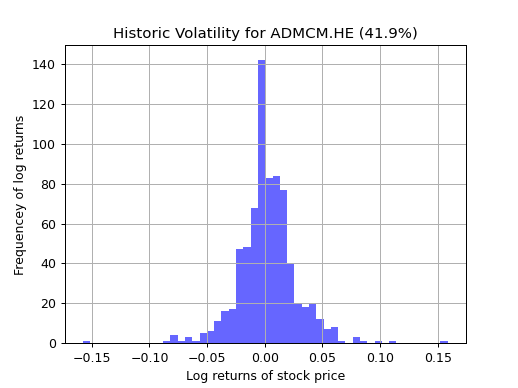

<IPython.core.display.Javascript object>


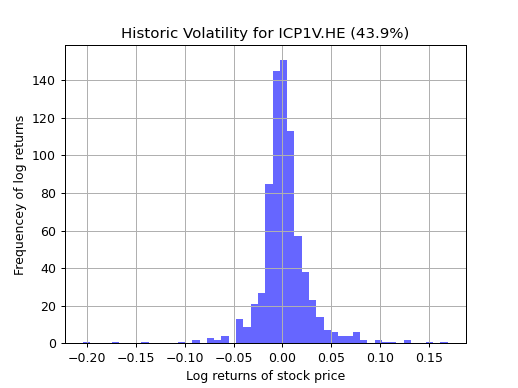

<IPython.core.display.Javascript object>


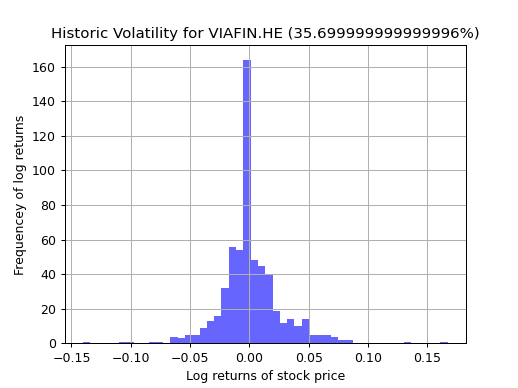

<IPython.core.display.Javascript object>


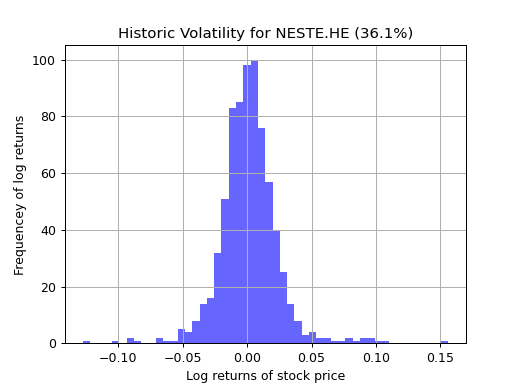

<IPython.core.display.Javascript object>


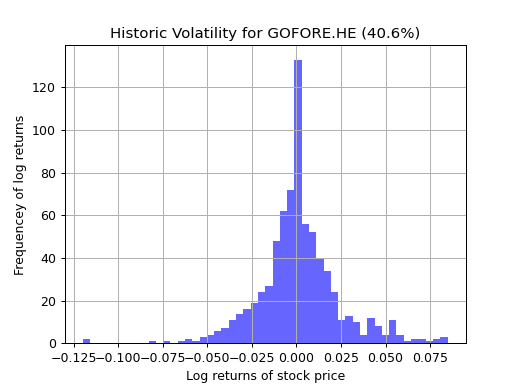

In [28]:
for n in range(len(df_volatility)):
    current_volatility = df_volatility[n]['Volatility'].iloc[-1]
    str_vol = str(round(current_volatility, 3)*100)


    fig, ax = plt.subplots()
    df_volatility[n]['Log Returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
    ax.set_xlabel("Log returns of stock price")
    ax.set_ylabel("Frequencey of log returns")
    ax.set_title("Historic Volatility for " + top_companies[n] + " (" + str_vol +"%)")